# Titanic tutorial
https://kaggle-kr.tistory.com/32

#### survival
* 0 = No, 1 = Yes
#### sibsp
* of siblings / spouses aboard the Titanic
#### parch
* of parents / children aboard the Titanic
#### embarked
* C = Cherbourg, Q = Queenstown, S = Southampton

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. 
#matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

In [5]:
import missingno as msno

In [6]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## 1. Dataset 확인

In [10]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1.1 Null data check

In [12]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [14]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


* Train, Test set 에서 Age(둘다 약 20%), Cabin(둘다 약 80%), Embarked(Train만 0.22%) null data 존재하는 것을 볼 수 있습니다.

In [18]:
# MANO라는 라이브러리를 사용하면 null data 존재 확인 용이
#msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.1,0.5,0.2))
#plt.show()

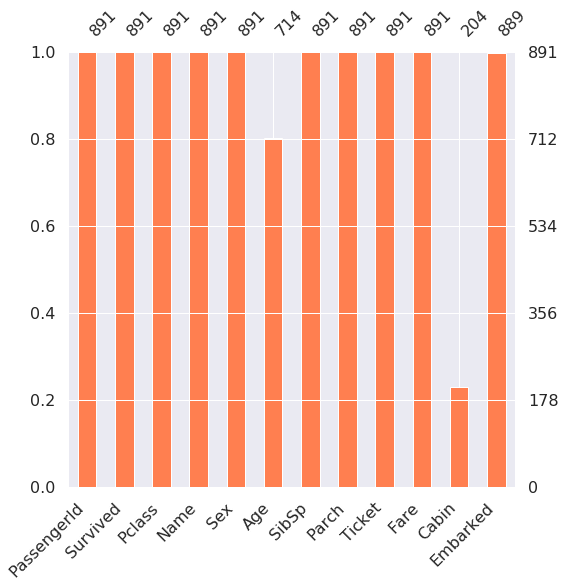

In [16]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color = 'coral')
plt.show()

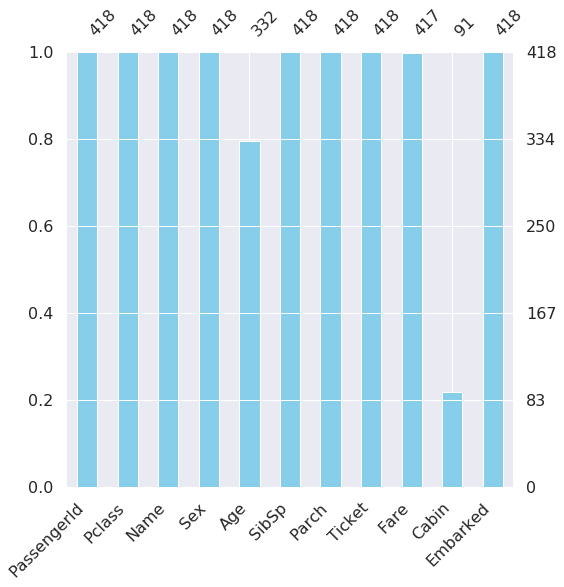

In [19]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color='skyblue')
plt.show()

### 1.2 Target label 확인
* binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

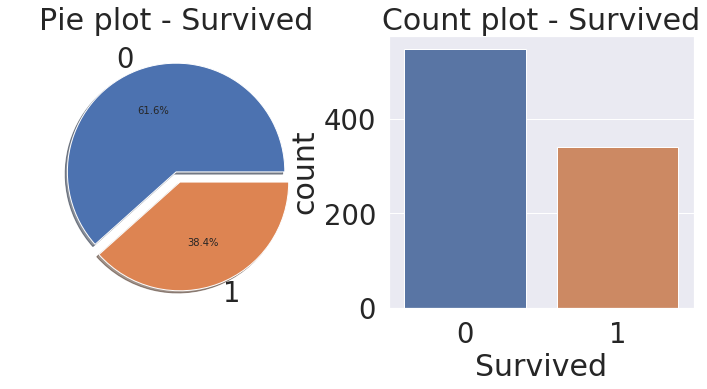

In [21]:
f, ax = plt.subplots(1,2, figsize=(12,5))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax= ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel(' ')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

* 38.4 % 가 살아남았습니다.
* target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 

# 2. Exploratory data analysis
## 2.1 Pclass

In [28]:
# Pclass별 수
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [120]:
#Pclass별 생존한 사람의 총합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


#### pandas crosstab 활용

In [30]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [53]:
#생존 비율
g=df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()
g.Survived.values

array([0.62962963, 0.47282609, 0.24236253])

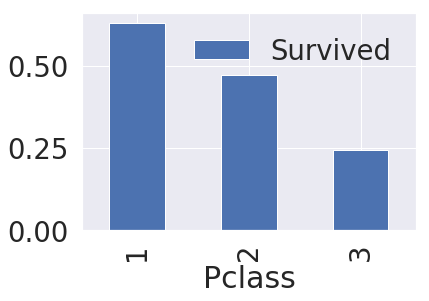

In [41]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.show()

* Pclass가 좋을수록 생존률이 높은 것을 확인

In [68]:
colors = ['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc']

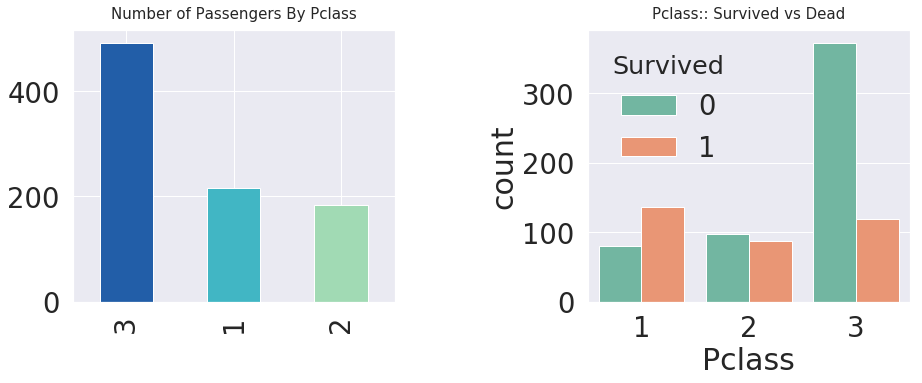

In [96]:
y_position=1.02
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_train['Pclass'].value_counts().plot.bar(color=colors, ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', size=15, y=y_position)
sns.countplot(x='Pclass', hue='Survived', data=df_train, palette="Set2",ax=ax[1])
ax[1].set_title('Pclass:: Survived vs Dead',size=15,y=y_position)
fig.subplots_adjust(wspace = 0.6, hspace = 0.3) 
plt.show()

* 클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 이다.
* 생존에 Pclass가 큰 영향을 미친다고 판단, 모델을 만들 때 이 feature를 사용하는 것이 좋을 수 있다고 예상.

## 2.2 Sex

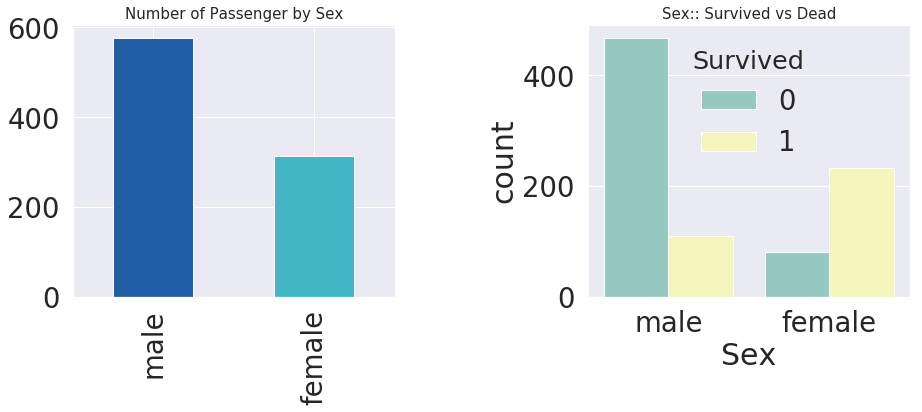

In [102]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_train['Sex'].value_counts().plot.bar(color=colors, ax=ax[0])
ax[0].set_title('Number of Passenger by Sex', size=15)
sns.countplot(x="Sex", hue='Survived', data=df_train, palette="Set3",ax=ax[1])
ax[1].set_title('Sex:: Survived vs Dead', size=15)
fig.subplots_adjust(wspace = 0.6, hspace=0.3)
plt.show()

* 전체 승객 수는 남자가 여자보다 많고, 생존률은 여자가 남자보다 높다.

In [108]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


In [110]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [116]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

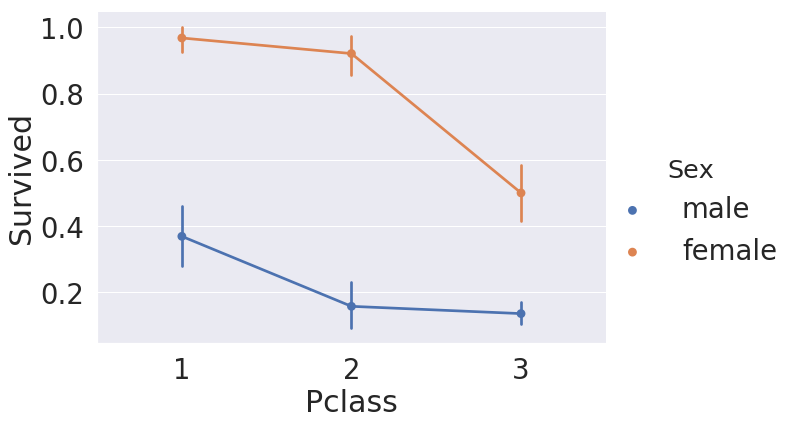

In [128]:
# seaborn 의 factorplot 이용
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
plt.show()

* 모든 클래스에서 female이 살 확률이 male보다 높다. 또한 남,여 상관없이 클래스가 높을 수록 살 확률이 높다.

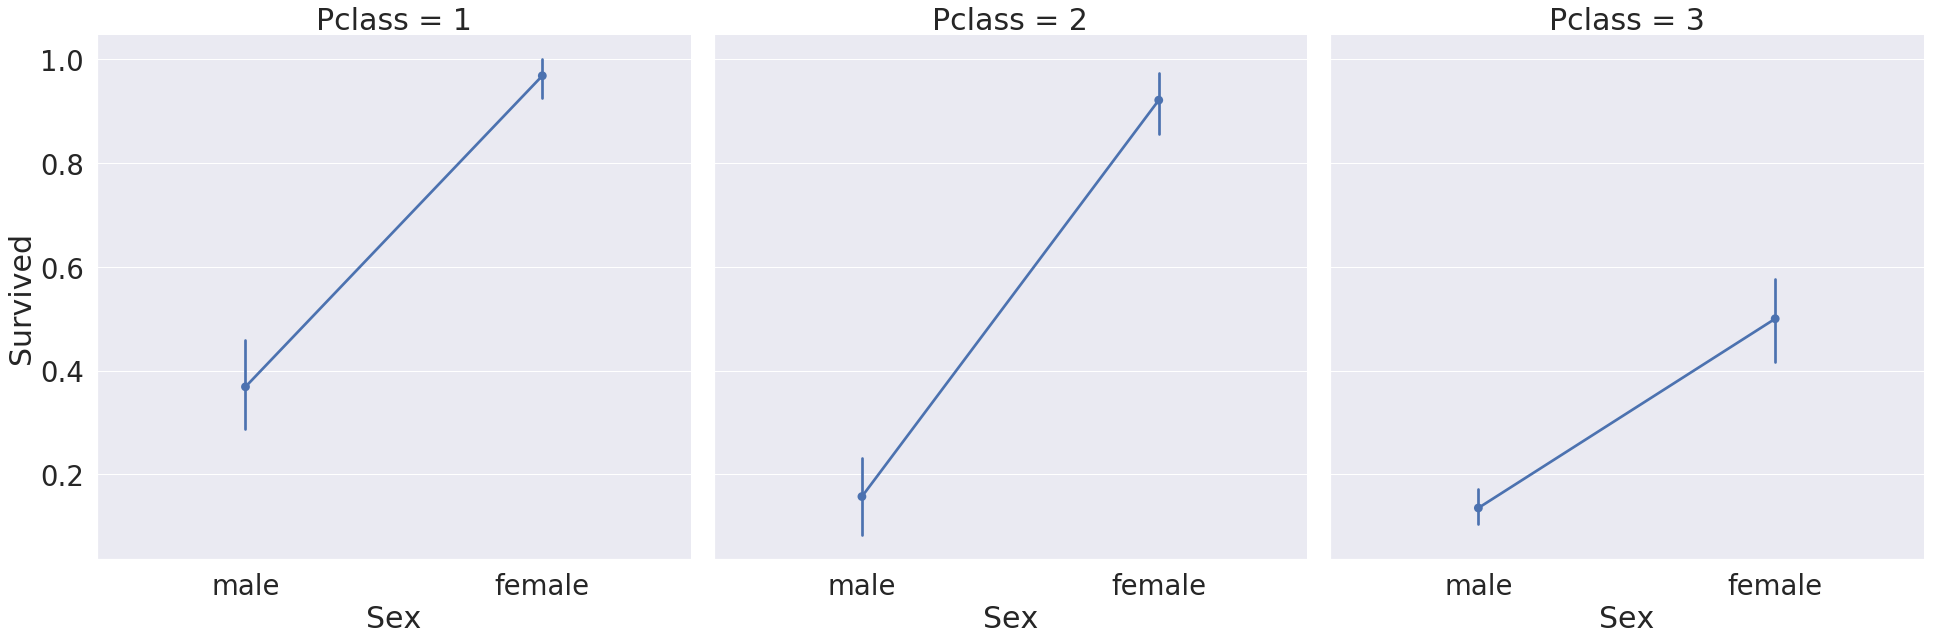

In [131]:
# hue대신 column사용
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)
plt.show()

## 2.4 Age

In [140]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


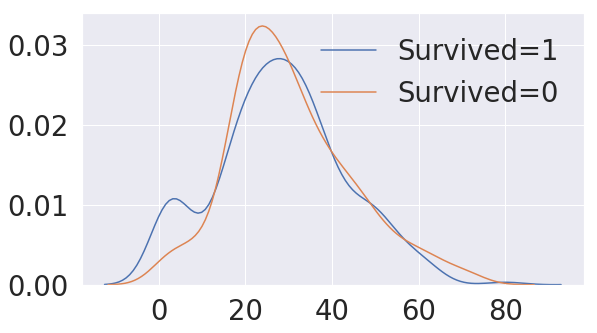

In [146]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived=1','Survived=0'])
plt.show()

* 나이가 어린 사람이 더 많이 살아남음

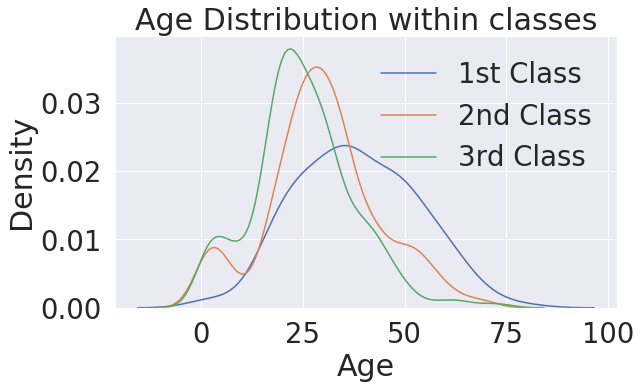

In [162]:
# Age distribution withing classes
labels = ['1st Class','2nd Class','3rd Class']
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Pclass']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass']==3]['Age'], ax=ax)
ax.set(xlabel='Age', ylabel='Density', label=labels)
ax.set_title('Age Distribution within classes')
plt.legend(labels)
plt.show()

* 상위 클래스일수록 나이 많은 사람의 비중이 커짐
* 나이 범위를 점점 넓혀가면서 생존률이 어떻게 되는지 살펴보자.

#### 나이에 따른 생존률 확인

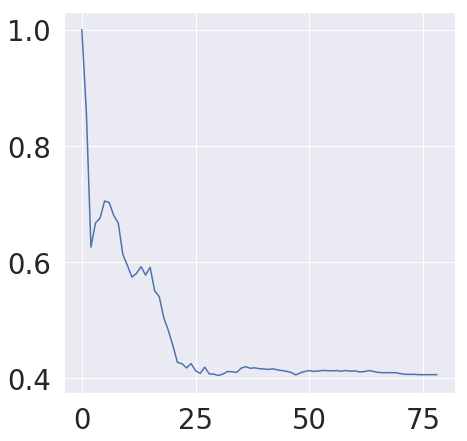

In [185]:
# 나이<i 조건일때 생존자 합계 / 나이 <i 조건일때 전체 행의 수
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))  
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio )
plt.show()

* 나이가 어릴수록 생존률이 높은것을 확인. 
* 나이가 중요한 feature로쓰일 수 있음을 확인

## 2.5 Pclass, Sex, Age

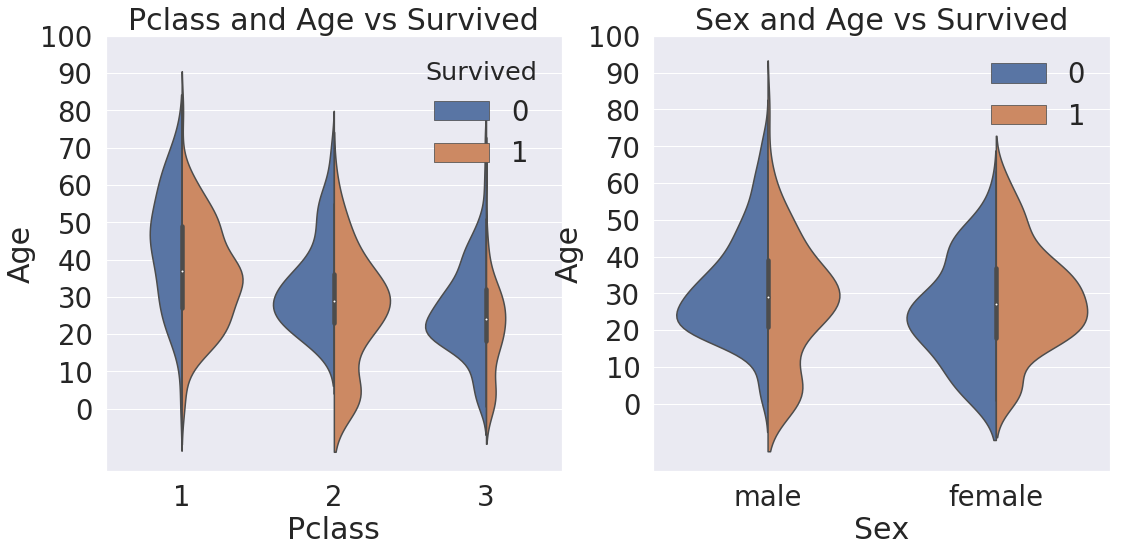

In [201]:
# violinplot
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df_train,scale='count',split=True, ax=ax[0]) # split=True해야 비교가 더 용이.
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))  #set_xticks, set_yticks로 X축, Y축 변경 가능.
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scaled='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.legend(loc=' upper right')
plt.show()

* 모든 클래스에서 나이가 어릴수록 생존률이 높음
* 여자가 남자보다 확연히 생존률이 높음
    * 즉, 여성과 아이의 생존률이 높은것으로 확인

## 2.6 Embarked

탑승한 곳에 따른 생존률

In [223]:
pd.crosstab(df_train['Embarked'],df_train['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


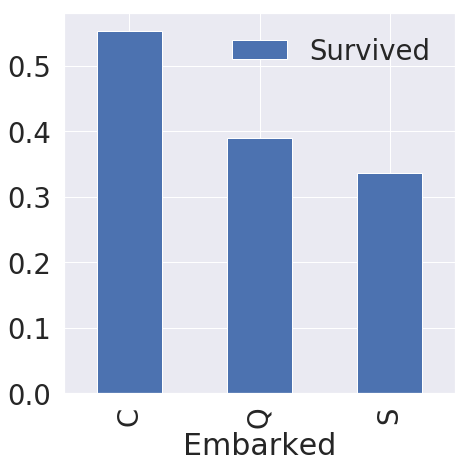

In [221]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar(ax=ax)   # mean은 각 Embarked위치에서의 생존률
plt.show()

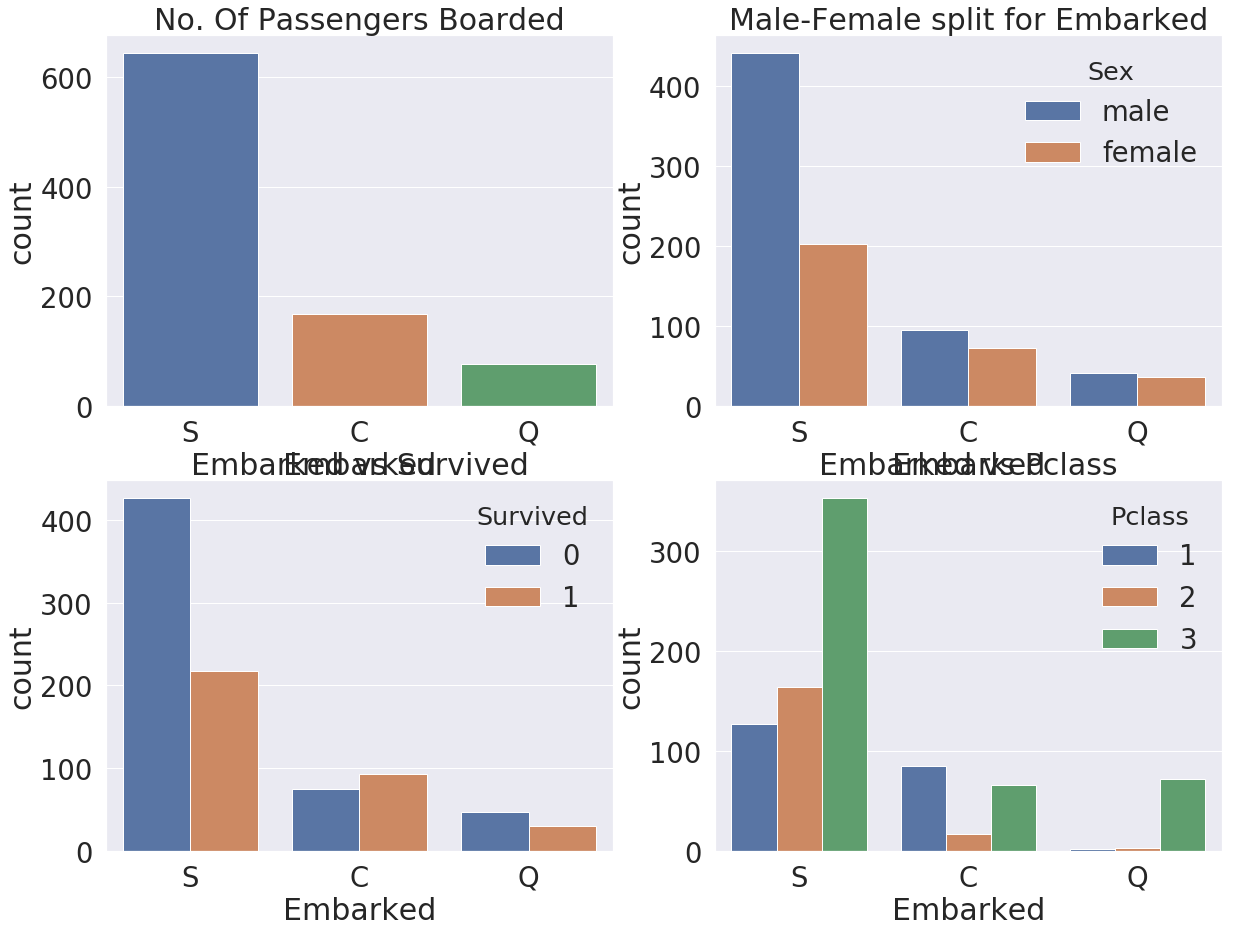

In [228]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

* S에서 가장 많은 사람이 탑승함
* S에서는 남자가 확연히 많이 탑승함
* S의경우 생존률이 많이 낮음
* C가 생존률이 높은건 높은 클래스 사람이 많이 타서임.
    * S는 3rd class가 많아서 생존확률이 낮음

## 2.7 Family-SibSp(형제 자매)+Parch(부모, 자녀)
* SibSp와 Parch를 합하면 Family가 되므로, 합해서 분석

In [230]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [231]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [233]:
print("Maximum size of Family:", df_train['FamilySize'].max())
print("Minimum size of Family:", df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


In [234]:
df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).count()

,FamilySize,Survived
0,1,537
1,2,161
2,3,102
3,4,29
4,5,15
5,6,22
6,7,12
7,8,6
8,11,7


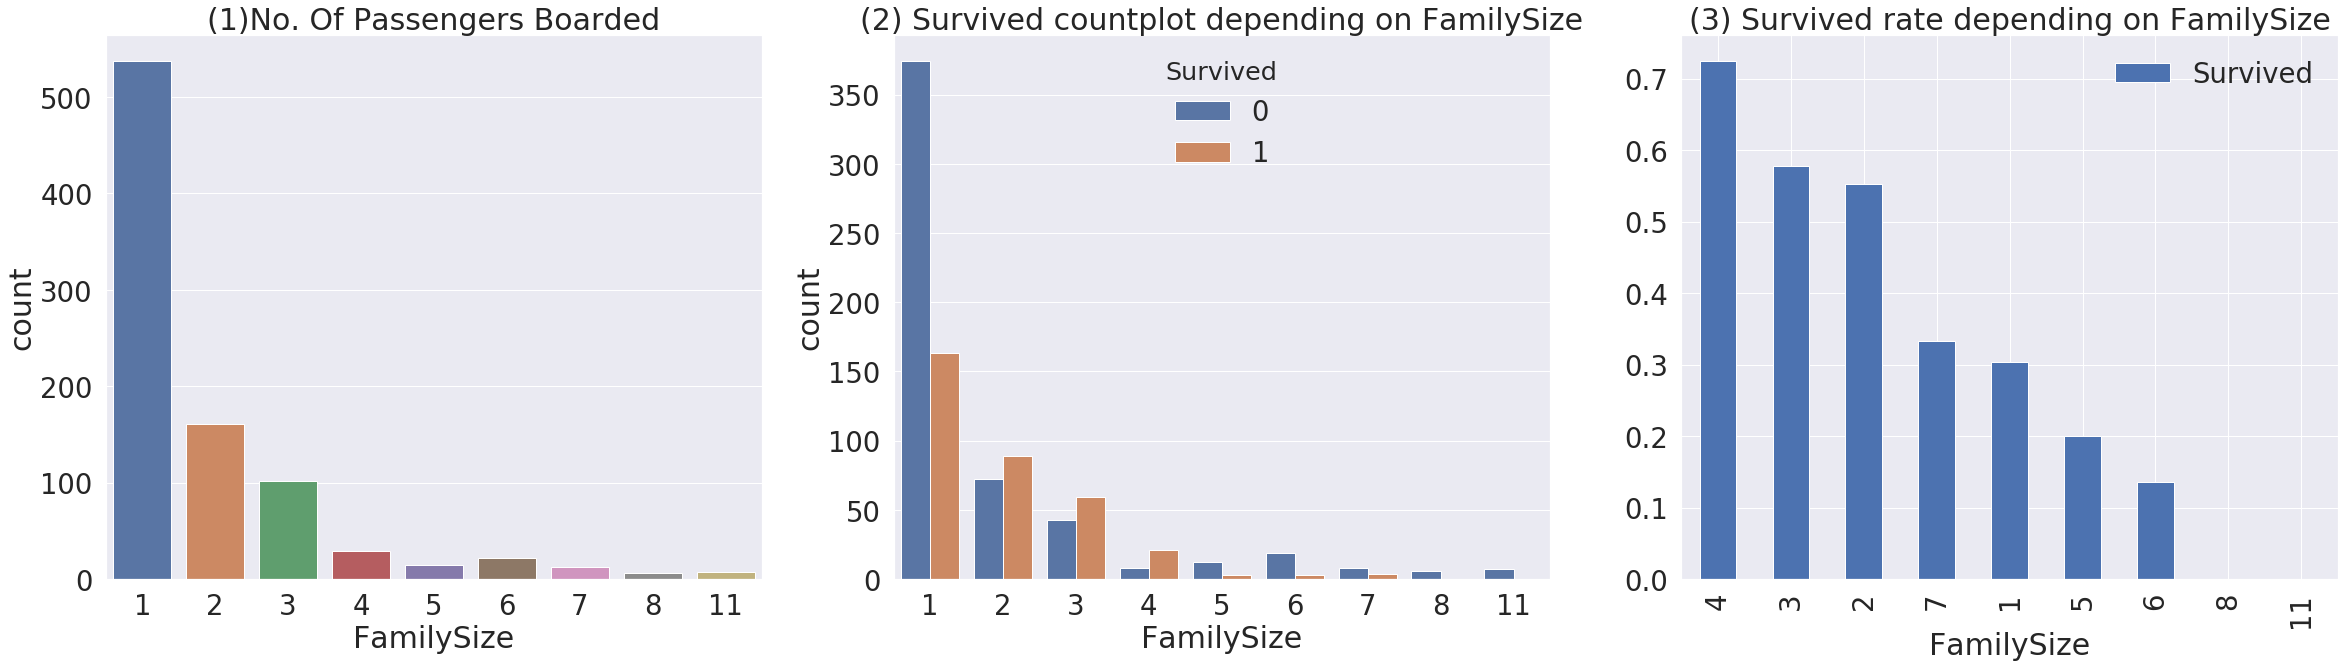

In [244]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1)No. Of Passengers Boarded')
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')
df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize')
plt.show()

* 가족 구성원 수는 1~11명까지 있는것을 확인. 대부분 1명이고 그 다음으로 2,3,4명.
* 가족이 4명인 경우가 생존률이 가장 높고, 가족구성원 수가 너무 작아도(1), 너무 커도 (5,6,11) 생존확률이 낮다. 
    * 3,4명이 생존확률이 높음.

## Fare
* Fare는 탑승요금이고 continuous feature이다.

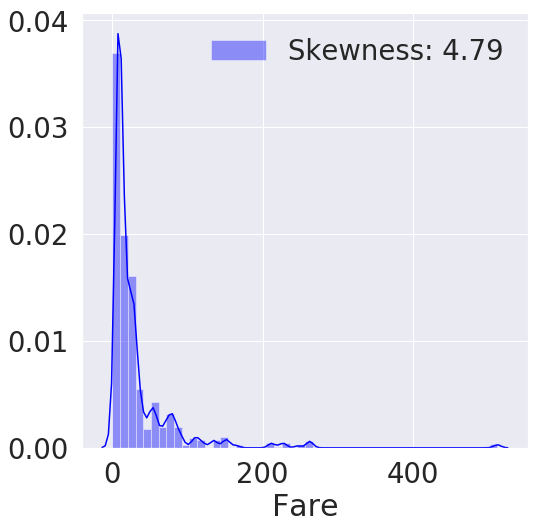

In [250]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='blue', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
plt.show()

* 분포가 매우 비대칭인 것을 확인. outlier 때문에 예측 시 좋지 못한 결과를 부를 수 있음.
* outlier 영향을 줄이기 위해 log 를 취한다.
* map, apply 활용
    * dataFrame의 특정 columns에 공통된 작업을 적용하고 싶을 때 활용.
* 우리가 원하는 Fare columns의 모든 데이터를 log 값 취하는 것을 하기 위해, lambda함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns데이터에 적용됨.


In [252]:
# testset에 있는 nan value를 평균값으로 치환
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [ ]:
df_train['Fare'].map()